# Mantar Sınıflandırması 🍄

Bu projede, "Mantar Sınıflandırması" veri kümesi olan kaggle.com'dan genel bir veri kümesini kullanacağız ve bir mantarın yenilebilir olup olmadığını anlamaya çalışacağız. Bu veri seti, 23 mantar türüne karşılık gelen örneklerin açıklamalarını içerir. Her tür yenilebilir veya zehirli olarak tanımlanır. Mantar söz konusu olduğunda, yenilebilirliği belirlemek için basit bir kural yoktur ve dikkatli olmalıyız.


## Gerekli kütüphaneleri import etme

Her zaman olduğu gibi gerekli kütüphaneleri import edeceğiz.

📌 Bunun için "import" ve "from" ifadelerini kullanacağız.

Verileri etiketlediğimiz için, bu sınıflandırma problemini çözmek için lojistik regresyon, ridge sınıflandırıcı, karar ağacı, Naive Bayes ve sinir ağları gibi denetimli öğrenme modellerini kullanabiliriz. Bir modele yeni bir mantar hakkında bilgi verdiğimizde, örneğin yenilebilir olduğunu söyleyecektir. Bu ifadenin doğru olma olasılığı belirli bir yüzdeye sahip olacaktır. Modelleri doğruluklarına göre karşılaştıracağız ve en iyi performans göstereni bulacağız.

In [2]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Import Logistic Regression, Ridge Classifier, Decision Tree
# Gaussian Naive Bayes, MLP Classifier and Random Forest models

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Import Classification Report function

from sklearn.metrics import classification_report

## Veri seti ve Önişleme

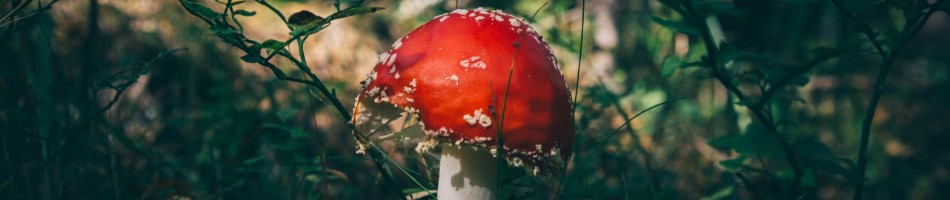

Veri setinin ön işlemesi ile başlıyoruz. Ön işlemeyi, ML algoritmaları tarafından kullanılacak verileri hazırlamak için attığımız tüm adımlar olarak düşünebilirsiniz. Projeye bağlı olarak, dizeleri tam sayılara dönüştürmeyi, görüntüleri gri tonlamaya dönüştürmeyi, görüntüleri yeniden boyutlandırmayı veya bunun gibi herhangi bir şeyi içerebilir. Ondan sonra eğitime geçeceğiz. Her zaman olduğu gibi, gerekli kütüphaneleri içe aktararak başlayacağız. Veri seti 8124 mantardan oluşan verileri içerir. Bu mantar örneklerinin her biri 22 özelliğe sahiptir ve yenilebilir veya zehirli olarak sınıflandırılır. 


Pandas read_csv() yöntemini kullanarak .csv dosyasını okuyalım. data.head() fonksiyonunu kullanarak veri setine bakalım.

### Veri okuma

.csv dosyasını okuyalım.

📌 Pandas kütüphanesinin read_csv() fonksiyonunu kullanacağız.

In [3]:
# "mushrooms.csv" dosyasını okuma.
data = pd.read_csv("mushrooms.csv")

### Verileri görelim
*data.head()* fonksiyonu ile veri setimizin ilk 5 satırını görelim.

In [10]:
# Verilerin ilk 5 satırını görüntülemek için head() fonksiyonunu kullanın
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Gördüğümüz gibi, model oluşturmak için kullanabileceğimiz başlığın şekli veya rengi gibi farklı özellikler var. Ayrıca, tüm hücrelerde dize tipi değerler bulunur. Ama bu daha sonra ele alacağımız bir sorun. Şimdi veri setini daha iyi anlamak için bazı görselleştirme tekniklerini kullanabiliriz. Örneğin, bir çubuk grafik oluşturarak farklı sınıfları karşılaştırabiliriz. Sınıf başına örnek sayısını bulmakla başlayacağız. Pandas DataFrame'in value_counts() yöntemi, gerekli bilgileri döndürür. Artık her sınıf için çubuklar oluşturabilir ve grafiği görüntüleyebiliriz.

Sınıf başına örnek sayısını bulmakla başlayacağız.

📌 value_counts() methodunu kullanacağız.

In [4]:
# Veri nesnesinin "class" sütununda value_counts yöntemini kullanın
siniflar = data["class"].value_counts()

# Sonucu bastıralım
siniflar

e    4208
p    3916
Name: class, dtype: int64

Bu bilgilerle her sınıf için çubuklar oluşturup grafiği görüntüleyebiliriz.

📌 Grafiği oluşturmak için .bar() metodunu kullanın.

📌 plt.show() kullanmayı unutmayın. Ya da bunun yerine sonuna noktalı virgül de kullanabiliriz. (;)

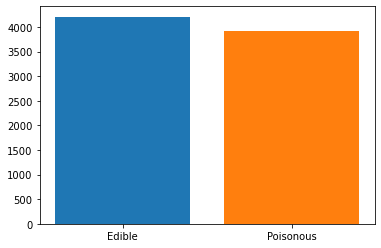

In [5]:
# Yenilebilir sınıf için çubuğu ekleyin
plt.bar("Edible", siniflar["e"])  #Edible : yenilebilir
# Zehirli sınıf için bar ekleyin
plt.bar("Poisonous", siniflar["p"]); #Poisonous : zehirli

# Grafiği göster
# plt.show()

Yenilebilir ve zehirli örneklerin sayısının birbirine çok yakın olduğunu görebiliyoruz. Bu, verilerimizin dengeli olduğu anlamına gelir. Dengeli olmasaydı, modelin daha fazla örnekle sınıfa daha yalın olma şansı daha yüksek olurdu. Ve modelimizin daha iyi genellenmesi için her sınıftaki örnek sayısını eşitlememiz gerekecekti.

Tüm sütunları kullanmayacağımız için, sadece .drop() kullanamaz ve veri kümesinden “sınıfı” kaldıramayız. Bunun yerine .loc() kullanacağız ve kullanacağımız özellikleri liste halinde vereceğiz.

### Özellikler ve Etiketler
Harika, verilerimizi daha iyi anlıyoruz. Şimdi onu özelliklere ve ilgili etiketlere ayıracağız.

Bizim durumumuzda, özellik olarak "cap-shape", "cap-color", "ring-number" ve "ring-type" sütunlarını kullanacağız.

📌 X ve y veri kümeleri oluşturmak için .loc() yöntemini kullanın.

In [19]:
# features için x değişkenini oluşturalım.

x = data.loc[:, ["cap-shape", "cap-color", "ring-number", "ring-type"]]

# çıktı etiketleri için y değişkenini oluşturalım.

y = data.loc[:, "class"]

### Değerleri dönüştürme

Daha önce de belirttiğimiz gibi, değerler string formatındadır. Onlarla matematiksel işlemler yapabilmek için onları tamsayı değerlere dönüştürmemiz gerekiyor. Bunun için etiket kodlamasını kullanacağız. 

📌X verilerinin birden çok sütunu olduğundan, tüm sütunları güncelleyebilmemiz için bunu bir for döngüsü içinde yapacağız. 

📌y verileri için doğrudan kodlayıcıyı kullanabiliriz. 

In [20]:
# LabelEncoder nesnesi oluşturun

encoder = LabelEncoder()

# Bir for döngüsü içinde özellikleri tam sayılara kodlayın

for i in x.columns:
    x[i] = encoder.fit_transform(x[i])

# Çıktı etiketlerini tamsayılara kodlayın

y = encoder.fit_transform(y)

Son verileri görmek için hem x hem de y'yi ekrana bastıralım.

In [21]:
#Print X
x

,cap-shape,cap-color,ring-number,ring-type
0,5,4,1,4
1,5,9,1,4
2,0,8,1,4
3,5,8,1,4
4,5,3,1,0
...,...,...,...,...
8119,3,4,1,4
8120,5,4,1,4
8121,2,4,1,4
8122,3,4,1,0


In [22]:
#Print y
y

array([1, 0, 0, ..., 0, 1, 0])

### Verileri bölme
Son olarak, verilerimizi eğitim ve test veri kümelerine bölebiliriz.

📌 Sklearn'den train_test_split işlevini kullanacağız.

In [28]:
# Veri setimizi 70-30 oranında eğitim ve test setlerine ayıracağız.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

## Model oluşturma ve eğitme

Verilerimiz kullanıma hazır! Modellerimizi karşılaştırma eğitimine geçelim.

Zaten ithal ettiğimiz modelleri kullanıyoruz.

📌 Model oluşturmak için ilgili sınıf adlarını kullanacağız.

In [29]:
# LogisticRegression() sınıfını kullanarak bir nesne oluşturalım.

logistic_classifier_model = LogisticRegression()

# RidgeClassifier() sınıfını kullanarak bir nesne oluşturalım.

ridge_classifier_model = RidgeClassifier()

# DecisionTreeClassifier() sınıfını kullanarak bir nesne oluşturalım.

decision_tree_model = DecisionTreeClassifier()

# GaussianNB() sınıfını kullanarak bir nesne oluşturalım.

naive_bayes_model = GaussianNB()

# MLPClassifier() sınıfını kullanarak bir nesne oluşturalım.

neural_network_model = MLPClassifier()

Daha sonra oluşturduğumuz X_train ve y_train veri seti ile tüm modelleri eğitiyoruz.

📌 Her nesnenin .fit() yöntemini kullanarak tüm modelleri eğitelim.

In [31]:
# Logistic Classifier modelini eğitelim.
logistic_classifier_model.fit(x_train, y_train)

# Ridge Classifier modelini eğitelim.
ridge_classifier_model.fit(x_train, y_train)

# Decision Tree modelini eğitelim.
decision_tree_model.fit(x_train, y_train)

# Naive Bayes modelini eğitelim.
naive_bayes_model.fit(x_train, y_train)

# Neural Network modelini eğitelim.
neural_network_model.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

X_test setini kullanarak her modelle tahminler yapar ve sonuçları ilgili değişkenlere kaydederiz.

📌 Her modelde .predict() yöntemini kullanın

In [32]:
# Logistic Classifier modelinde test veri setini kullanarak tahmin yapalım.

logistic_tahmin = logistic_classifier_model.predict(x_test)

# Ridge Classifier modelinde test veri setini kullanarak tahmin yapalım.

ridge_tahmin = ridge_classifier_model.predict(x_test)

# Decision Tree modelinde test veri setini kullanarak tahmin yapalım.

decision_tahmin = decision_tree_model.predict(x_test)

# Naive Bayes modelinde test veri setini kullanarak tahmin yapalım.

naive_bayes_tahmin = naive_bayes_model.predict(x_test)

# Neural Network modelinde test veri setini kullanarak tahmin yapalım.

neural_network_tahmin = neural_network_model.predict(x_test)


## Performansları karşılaştırma

Kesinlik, geri çağırma, f-1 puanı ve doğruluğu ayrı ayrı hesaplamak yerine, performansları karşılaştırmak için bir rapor oluşturabiliriz.

📌class_report() fonksiyonu kullanmamız gereken fonksiyondur.

📌 Tüm modellerin sonuçlarını görelim.

In [33]:
# Logistic Classifier modeli için Sınıflandırma Raporu oluşturalım.

logistic_rapor = classification_report(y_test, logistic_tahmin)

# Ridge Classifier modeli için Sınıflandırma Raporu oluşturalım.

ridge_rapor = classification_report(y_test, ridge_tahmin)

# Decision Tree modeli için Sınıflandırma Raporu oluşturalım.

decision_rapor = classification_report(y_test, decision_tahmin)

# Naive Bayes modeli için Sınıflandırma Raporu oluşturalım.

naive_bayes_rapor = classification_report(y_test, naive_bayes_tahmin)

# Neural Network modeli için Sınıflandırma Raporu oluşturalım.

neural_network_rapor = classification_report(y_test, neural_network_tahmin)

In [34]:
# Logistic Regression modelinin raporunu yazdıralım.

print("*****Logistic Regression*****")
print(logistic_rapor)

# Ridge Regression modelinin raporunu yazdıralım.

print("*****Ridge Regression*****")
print(ridge_rapor)

# Decision Tree modelinin raporunu yazdıralım.

print("*****Decision Tree*****")
print(decision_rapor)

# Naive Bayes modelinin raporunu yazdıralım.

print("*****Naive Bayes*****")
print(naive_bayes_rapor)

# Neural Network modelinin raporunu yazdıralım.

print("*****Neural Network*****")
print(neural_network_rapor)

*****Logistic Regression*****
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1283
           1       0.78      0.77      0.78      1155

    accuracy                           0.79      2438
   macro avg       0.79      0.79      0.79      2438
weighted avg       0.79      0.79      0.79      2438

*****Ridge Regression*****
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1283
           1       0.78      0.77      0.78      1155

    accuracy                           0.79      2438
   macro avg       0.79      0.79      0.79      2438
weighted avg       0.79      0.79      0.79      2438

*****Decision Tree*****
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1283
           1       0.88      0.92      0.90      1155

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90    

%91 doğrulukla Karar Ağacı algoritmasının tüm puan türlerinde en iyi performansı gösterdiğini görebiliriz. Doğruluklara baktığımızda, üç modelin, doğrusal regresyon, sırt regresyonu ve saf bayes'in en kötü performansı gösterdiğini görebiliriz. 

###  Değerlendirme

Karar ağacı en iyi performansı göstermiştir. Böylece belki bir adım daha ileri gidebilir ve daha iyi çalışıp çalışmadığını görmek için Random Forest algoritmasını deneyebiliriz.

📌 Aynı adımları izleyelim ve Random Forest için sınıflandırma raporunu yazdıralım.

In [36]:
# Random Forest Classifier nesnesi oluşturalım, eğitelim ve tahminler yapalım

random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)
random_forest_tahmin = random_forest_model.predict(x_test)

In [39]:
# Random Forest modeli için bir Sınıflandırma Raporu oluşturalım.

random_forest_rapor = classification_report(y_test, random_forest_tahmin)

# Sınıflandırma Raporunu yazdıralım.

print(random_forest_rapor)


              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1283
           1       0.88      0.92      0.90      1155

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438



Hem Karar Ağacı hem de Rastgele Orman algoritmalarının aynı sonucu verdiğine dikkat edin. Bu veri seti için Karar Ağacı veya Rastgele Orman kullanmak arasında bir fark olmadığı sonucuna varabiliriz. Modellerin başlangıç ​​değerleri rastgele oluşturulduğu için her seferinde farklı sonuçlar elde etmek mümkündür. Modelleri değerlendirirken ve karşılaştırırken bunu daima aklınızda bulundurun.
